In [239]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, Model, regularizers
import os
from PIL import Image

In [5]:
data_path = 'metadata.csv'
images_path = 'images'
path_anno = "annotations"

In [6]:
column_names = ['patientid','offset','sex','age','finding','survival','intubated','intubation_present','went_icu','in_icu','needed_supplemental_O2','extubated','temperature','pO2_saturation','leukocyte_count','neutrophil_count','lymphocyte_count','view','modality','date','location','folder','filename','doi','url','license','clinical_notes','other_notes']

In [7]:
len(column_names)

28

In [8]:
df = pd.read_csv(data_path, names=column_names, header=None, skiprows=[0], index_col=False)

In [9]:
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [10]:
df = df[['finding', 'view', 'modality', 'folder', 'filename']]\

In [11]:
df.head()

,finding,view,modality,folder,filename
0,COVID-19,PA,X-ray,images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,COVID-19,PA,X-ray,images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,COVID-19,PA,X-ray,images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,COVID-19,PA,X-ray,images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,COVID-19,PA,X-ray,images,nejmc2001573_f1a.jpeg


In [12]:
df.folder.unique()

array(['images', 'volumes'], dtype=object)

In [13]:
df.shape

(372, 5)

In [14]:
df = df[df['folder'] == 'images']

In [15]:
df.shape

(351, 5)

In [74]:
images = np.array([Image.open(os.path.join(images_path, file)).convert('RGB') for file in df['filename']], dtype='object')

In [75]:
# for file in df['filename'][:5]:
#     x = Image.open(os.path.join(images_path, file)).convert('L').resize((156, 156))
#     print(x.size)
#     plt.figure()
#     plt.imshow(x)

In [76]:
images.shape

(351,)

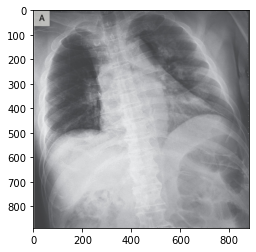

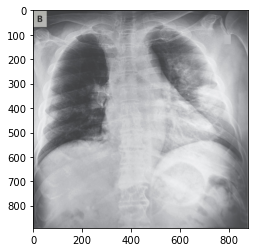

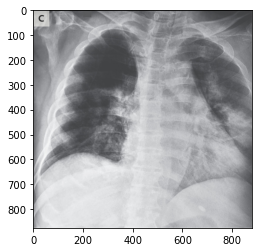

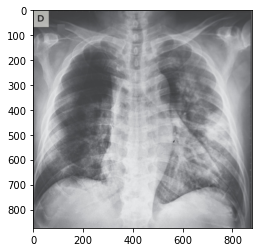

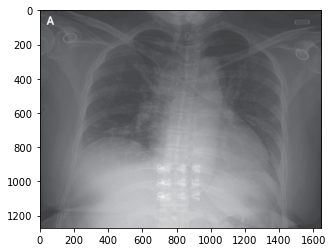

In [77]:
for image in images[:5]:
    plt.figure()
    plt.imshow(image)

In [78]:
sizes = np.array([im.size for im in images])

In [79]:
sizes.shape

(351, 2)

In [80]:
for size in sizes[:5]:
    print(size)

[882 888]
[880 891]
[882 876]
[880 874]
[1645 1272]


In [81]:
print(np.min(sizes[:, 0]), np.min(sizes[:, 1]))

157 156


In [82]:
images_resized = np.array([image.resize((156,156)) for image in images], dtype='object')

In [83]:
sizes_check = np.array([im.size for im in images_resized])

In [84]:
for size in sizes_check[:5]:
    print(size)

[156 156]
[156 156]
[156 156]
[156 156]
[156 156]


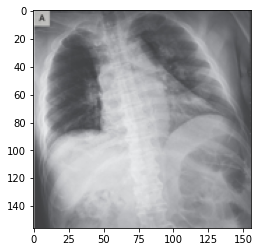

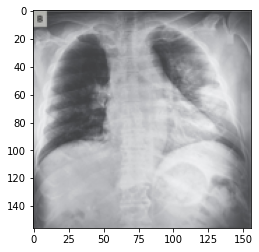

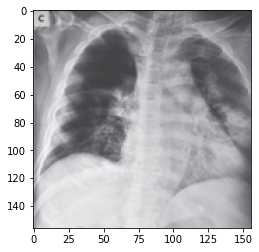

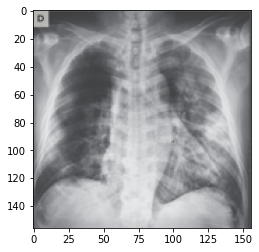

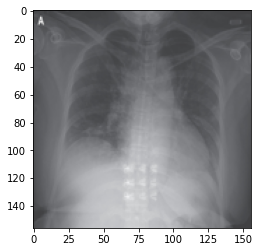

In [85]:
for image in images_resized[:5]:
    plt.figure()
    plt.imshow(image)

In [87]:
images_np = np.array([np.array(image) for image in images_resized])

In [88]:
images_np.shape

(351, 156, 156, 3)

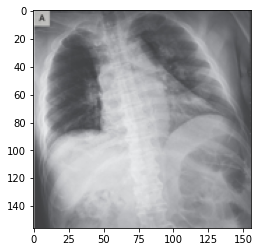

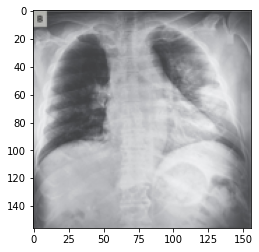

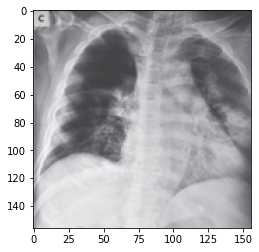

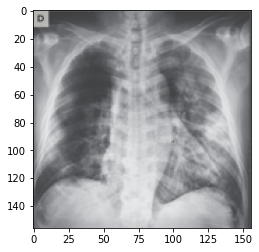

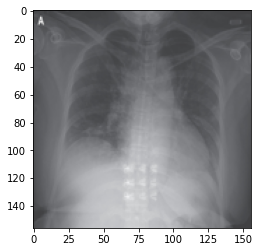

In [89]:
for image in images_np[:5]:
    plt.figure()
    plt.imshow(image)

In [90]:
print(np.min(images_np), np.max(images_np))

0 255


In [91]:
images_normal = (images_np - np.min(images_np)) / (np.max(images_np) - np.min(images_np))

In [92]:
print(np.min(images_normal), np.max(images_normal))

0.0 1.0


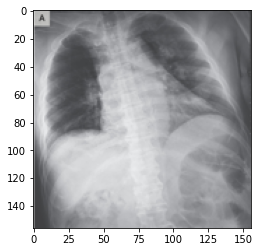

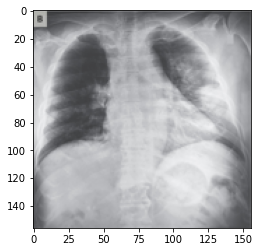

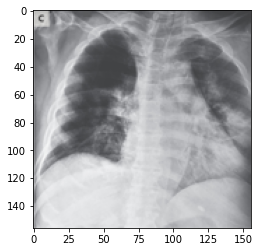

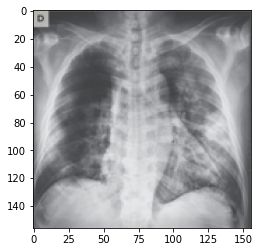

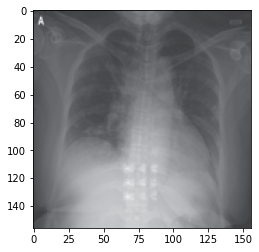

In [93]:
for image in images_normal[:5]:
    plt.figure()
    plt.imshow(image)

In [106]:
images_final = images_normal.copy()

In [107]:
images_final.shape

(351, 156, 156, 3)

In [108]:
df.head()

,finding,view,modality,folder,filename
0,COVID-19,PA,X-ray,images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,COVID-19,PA,X-ray,images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,COVID-19,PA,X-ray,images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,COVID-19,PA,X-ray,images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,COVID-19,PA,X-ray,images,nejmc2001573_f1a.jpeg


In [109]:
df.finding.value_counts()

COVID-19          275
Streptococcus      17
SARS               16
Pneumocystis       15
COVID-19, ARDS     12
E.Coli              4
ARDS                4
No Finding          3
Chlamydophila       2
Legionella          2
Klebsiella          1
Name: finding, dtype: int64

In [110]:
df_alt = df.copy()
df_alt.loc[df_alt['finding'] != 'COVID-19', 'finding'] = 'NOT COVID'

In [111]:
df_alt.finding.value_counts()

COVID-19     275
NOT COVID     76
Name: finding, dtype: int64

In [112]:
labels = df_alt['finding'].to_numpy()

In [113]:
labels_oh = np.zeros((labels.shape[0], 2))

In [114]:
locations = {'COVID-19': 0, 'NOT COVID': 1}
for e, label in enumerate(labels):
    labels_oh[e][locations[label]] = 1

In [115]:
print(images_final.shape, labels_oh.shape)

(351, 156, 156, 3) (351, 2)


In [116]:
#images_2d = images_final.reshape((images_final.shape[0], int(np.sqrt(images_final.shape[1])), int(np.sqrt(images_final.shape[1])), 1))
images_2d = images_final.copy()

In [117]:
idx = np.random.permutation(images_2d.shape[0])
data, labels = images_2d[idx], labels_oh[idx]

In [118]:
train_percentage = 0.8
n_train = int(train_percentage * data.shape[0])

In [119]:
train_images, train_labels = data[:n_train], labels[:n_train]
test_images, test_labels = data[n_train:], labels[n_train:]

In [120]:
train_images.shape

(280, 156, 156, 3)

In [152]:
model_final = models.Sequential()
model_final.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model_final.add(layers.BatchNormalization())
model_final.add(layers.MaxPooling2D((2, 2)))
model_final.add(layers.BatchNormalization())
model_final.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.MaxPooling2D((2, 2)))
model_final.add(layers.BatchNormalization())
model_final.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_final.add(layers.BatchNormalization())
model_final.add(layers.MaxPooling2D((2, 2)))
model_final.add(layers.BatchNormalization())

model_final.add(layers.Flatten())
model_final.add(layers.Dense(64, activation='relu'))
model_final.add(layers.Dense(2, activation='softmax'))


In [153]:
model_final.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [154]:
history_final = model_final.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
9/9 [==============================] - 27s 3s/step - loss: 0.6568 - accuracy: 0.6821 - val_loss: 0.7163 - val_accuracy: 0.1972
Epoch 2/20
9/9 [==============================] - 27s 3s/step - loss: 0.5248 - accuracy: 0.7536 - val_loss: 0.6917 - val_accuracy: 0.5070
Epoch 3/20
9/9 [==============================] - 25s 3s/step - loss: 0.4613 - accuracy: 0.7750 - val_loss: 0.6809 - val_accuracy: 0.7183
Epoch 4/20
9/9 [==============================] - 26s 3s/step - loss: 0.3995 - accuracy: 0.8286 - val_loss: 0.6540 - val_accuracy: 0.8169
Epoch 5/20
9/9 [==============================] - 27s 3s/step - loss: 0.3720 - accuracy: 0.8429 - val_loss: 0.6240 - val_accuracy: 0.8169
Epoch 6/20
9/9 [==============================] - 27s 3s/step - loss: 0.3439 - accuracy: 0.8536 - val_loss: 0.5988 - val_accuracy: 0.8169
Epoch 7/20
9/9 [==============================] - 26s 3s/step - loss: 0.3085 - accuracy: 0.8821 - val_loss: 0.5813 - val_accuracy: 0.8169
Epoch 8/20
9/9 [==================

In [155]:
model_final.save('models/model_final_lukas')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/model_final_lukas\assets


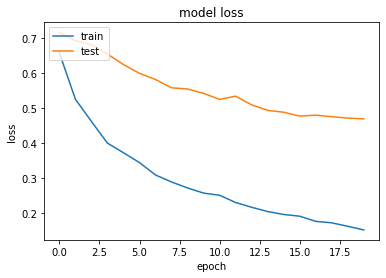

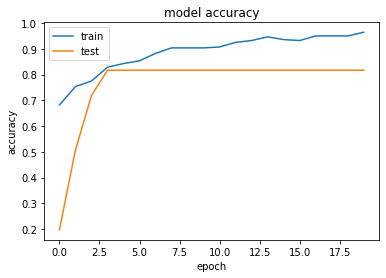

In [227]:
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('figures/model_loss.png')
plt.show()

plt.figure()
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('figures/model_accuracy.png')
plt.show()

In [162]:
model_final.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 154, 154, 32)      896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 154, 154, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 77, 77, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 77, 77, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_26 (Batc (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 64)       

In [163]:
model_final_short = Model(inputs=model_final.input, outputs=model_final.get_layer('flatten_7').output)

In [164]:
model_final_short.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12_input (InputLayer) [(None, 156, 156, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 154, 154, 32)      896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 154, 154, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 77, 77, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 77, 77, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_26 (Batc (None, 75, 75, 64)        256   

In [165]:
support_set, query_set = model_final_short(train_images), model_final_short(test_images)

In [166]:
support_set.shape, query_set.shape

(TensorShape([280, 18496]), TensorShape([71, 18496]))

In [171]:
def calculate_distances(support, query, labels):
    all_distances = []
    for test_features in query:
        sample_distances = []
        for train_features, label in zip(support, labels):
            distance = np.sqrt(((test_features - train_features) ** 2).numpy().sum())
            sample_distances.append([distance, np.argmax(label)])
        all_distances.append(sorted(sample_distances, key=lambda x: x[0]))
    return np.array(all_distances)

In [172]:
def knn(all_distances, k):
    predictions = np.zeros((all_distances.shape[0], 2))
    for e, distances in enumerate(all_distances):
        k_distances = distances[:k]
        k_labels = k_distances[:, -1]
        one_hot_arg = int(max(set(k_labels), key=list(k_labels).count))
        predictions[e][one_hot_arg] = 1
    return predictions

In [235]:
all_distances = calculate_distances(support_set, query_set, train_labels)

In [205]:
for k in range(1, 23, 2):
    predictions_knn = knn(all_distances, k)
    correct = (predictions_knn[:, 0] == test_labels[:, 0]).sum()
    accuracy = correct / query_set.shape[0]
    print(f'Accuracy for k={k}: {accuracy}')

Accuracy for k=1: 0.7183098591549296
Accuracy for k=3: 0.7746478873239436
Accuracy for k=5: 0.7887323943661971
Accuracy for k=7: 0.8028169014084507
Accuracy for k=9: 0.8028169014084507
Accuracy for k=11: 0.8169014084507042
Accuracy for k=13: 0.8450704225352113
Accuracy for k=15: 0.8450704225352113
Accuracy for k=17: 0.8591549295774648
Accuracy for k=19: 0.8450704225352113
Accuracy for k=21: 0.8309859154929577


In [206]:
sparse_training_images, sparse_training_labels = [], []
sparse_testing_images, sparse_testing_labels = data, labels
max_samples = 5
sample_counts = [0, 0]
delete_locations = []
for e, (image, label) in enumerate(zip(sparse_testing_images, sparse_testing_labels)):
    if sample_counts[0] == max_samples and sample_counts[1] == max_samples:
        break
    if label[0] == 1 and sample_counts[0] < max_samples:
        sparse_training_images.append(image)
        sparse_training_labels.append(label)
        sample_counts[0] += 1
        delete_locations.append(e)
    elif label[0] == 0 and sample_counts[1] < max_samples:
        sparse_training_images.append(image)
        sparse_training_labels.append(label)
        sample_counts[1] += 1
        delete_locations.append(e)
sparse_training_images = np.array(sparse_training_images)
sparse_training_labels = np.array(sparse_training_labels)
sparse_testing_images = np.delete(data, delete_locations, 0)
sparse_testing_labels = np.delete(labels, delete_locations, 0)

In [255]:
model_sparse = models.Sequential()
model_sparse.add(layers.Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=train_images.shape[1:]))
model_sparse.add(layers.BatchNormalization())
model_sparse.add(layers.MaxPooling2D((2, 2)))
model_sparse.add(layers.BatchNormalization())
model_sparse.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model_sparse.add(layers.BatchNormalization())
model_sparse.add(layers.MaxPooling2D((2, 2)))
model_sparse.add(layers.BatchNormalization())
model_sparse.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model_sparse.add(layers.BatchNormalization())
model_sparse.add(layers.MaxPooling2D((2, 2)))
model_sparse.add(layers.BatchNormalization())

model_sparse.add(layers.Flatten())
model_sparse.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model_sparse.add(layers.Dense(2, activation='softmax'))

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=100)

In [256]:
model_sparse.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [257]:
history_sparse = model_sparse.fit(sparse_training_images, sparse_training_labels, epochs=20, 
                    validation_data=(sparse_testing_images, sparse_testing_labels), callbacks=[es])

Epoch 1/20
1/1 [==============================] - 8s 8s/step - loss: 2.9129 - accuracy: 0.7000 - val_loss: 3.1269 - val_accuracy: 0.2405
Epoch 2/20
1/1 [==============================] - 8s 8s/step - loss: 2.5670 - accuracy: 0.9000 - val_loss: 3.1564 - val_accuracy: 0.2082
Epoch 3/20
1/1 [==============================] - 9s 9s/step - loss: 2.4487 - accuracy: 1.0000 - val_loss: 3.1723 - val_accuracy: 0.2082
Epoch 4/20
1/1 [==============================] - 8s 8s/step - loss: 2.4007 - accuracy: 1.0000 - val_loss: 3.1860 - val_accuracy: 0.2082
Epoch 5/20
1/1 [==============================] - 8s 8s/step - loss: 2.3906 - accuracy: 1.0000 - val_loss: 3.1971 - val_accuracy: 0.2082
Epoch 6/20
1/1 [==============================] - 9s 9s/step - loss: 2.3856 - accuracy: 1.0000 - val_loss: 3.2072 - val_accuracy: 0.2082
Epoch 7/20
1/1 [==============================] - 8s 8s/step - loss: 2.3813 - accuracy: 1.0000 - val_loss: 3.2180 - val_accuracy: 0.2082
Epoch 8/20
1/1 [=========================

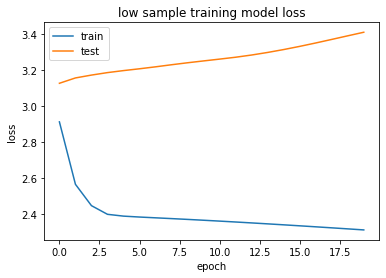

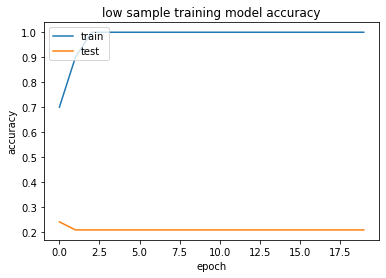

In [258]:
plt.plot(history_sparse.history['loss'])
plt.plot(history_sparse.history['val_loss'])
plt.title('low sample training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('figures/sparse_model_loss.png')
plt.show()

plt.figure()
plt.plot(history_sparse.history['accuracy'])
plt.plot(history_sparse.history['val_accuracy'])
plt.title('low sample training model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('figures/sparse_model_accuracy.png')
plt.show()

In [259]:
model_sparse.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 154, 154, 32)      896       
_________________________________________________________________
batch_normalization_102 (Bat (None, 154, 154, 32)      128       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 77, 77, 32)        0         
_________________________________________________________________
batch_normalization_103 (Bat (None, 77, 77, 32)        128       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_104 (Bat (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 37, 37, 64)      

In [262]:
model_sparse_short = Model(inputs=model_sparse.input, outputs=model_sparse.get_layer('flatten_20').output)

In [263]:
model_sparse_short.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51_input (InputLayer) [(None, 156, 156, 3)]     0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 154, 154, 32)      896       
_________________________________________________________________
batch_normalization_102 (Bat (None, 154, 154, 32)      128       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 77, 77, 32)        0         
_________________________________________________________________
batch_normalization_103 (Bat (None, 77, 77, 32)        128       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_104 (Bat (None, 75, 75, 64)        256 

In [264]:
sparse_support_set, sparse_query_set = model_sparse_short(sparse_training_images), model_sparse_short(sparse_testing_images)

In [265]:
sparse_support_set.shape, sparse_query_set.shape

(TensorShape([10, 18496]), TensorShape([341, 18496]))

In [266]:
all_sparse_distances = calculate_distances(sparse_support_set, sparse_query_set, sparse_training_labels)

In [268]:
for k in range(1, 10, 2):
    predictions_knn = knn(all_sparse_distances, k)
    correct = (predictions_knn[:, 0] == sparse_testing_labels[:, 0]).sum()
    accuracy = correct / sparse_query_set.shape[0]
    print(f'Accuracy for k={k}: {accuracy}')

Accuracy for k=1: 0.5513196480938416
Accuracy for k=3: 0.6334310850439883
Accuracy for k=5: 0.6011730205278593
Accuracy for k=7: 0.6011730205278593
Accuracy for k=9: 0.39882697947214074


In [269]:
benchmark_support, benchmark_query = sparse_training_images, sparse_testing_images

In [270]:
benchmark_support.shape, benchmark_query.shape

((10, 156, 156, 3), (341, 156, 156, 3))

In [273]:
def calculate_distances_np(support, query, labels):
    all_distances = []
    for test_features in query:
        sample_distances = []
        for train_features, label in zip(support, labels):
            distance = np.sqrt(((test_features - train_features) ** 2).sum())
            sample_distances.append([distance, np.argmax(label)])
        all_distances.append(sorted(sample_distances, key=lambda x: x[0]))
    return np.array(all_distances)

In [274]:
all_benchmark_distances = calculate_distances_np(benchmark_support, benchmark_query, sparse_training_labels)

In [275]:
for k in range(1, 10, 2):
    predictions_knn = knn(all_benchmark_distances, k)
    correct = (predictions_knn[:, 0] == sparse_testing_labels[:, 0]).sum()
    accuracy = correct / benchmark_query.shape[0]
    print(f'Accuracy for k={k}: {accuracy}')

Accuracy for k=1: 0.5513196480938416
Accuracy for k=3: 0.6656891495601173
Accuracy for k=5: 0.7683284457478006
Accuracy for k=7: 0.782991202346041
Accuracy for k=9: 0.7390029325513197


In [325]:
train_percentage = 0.2
n_train = int(train_percentage * data.shape[0])

In [326]:
train_images, train_labels = data[:n_train], labels[:n_train]
test_images, test_labels = data[n_train:], labels[n_train:]

In [327]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((70, 156, 156, 1), (70, 2), (281, 156, 156, 1), (281, 2))

In [328]:
model_sparse = models.Sequential()
model_sparse.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model_sparse.add(layers.BatchNormalization())
model_sparse.add(layers.MaxPooling2D((2, 2)))
model_sparse.add(layers.BatchNormalization())
model_sparse.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_sparse.add(layers.BatchNormalization())
model_sparse.add(layers.MaxPooling2D((2, 2)))
model_sparse.add(layers.BatchNormalization())
model_sparse.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_sparse.add(layers.BatchNormalization())
model_sparse.add(layers.MaxPooling2D((2, 2)))
model_sparse.add(layers.BatchNormalization())

model_sparse.add(layers.Flatten())
model_sparse.add(layers.Dense(64, activation='relu'))
model_sparse.add(layers.Dense(2, activation='softmax'))

es = callbacks.EarlyStopping(monitor='val_loss', mode='min')

In [330]:
model_sparse.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [331]:
history_sparse = model_sparse.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), callbacks=[es])

Epoch 1/10
3/3 [==============================] - 10s 3s/step - loss: 0.8089 - accuracy: 0.5429 - val_loss: 0.6726 - val_accuracy: 0.8149
Epoch 2/10
3/3 [==============================] - 11s 4s/step - loss: 0.5999 - accuracy: 0.6571 - val_loss: 0.6706 - val_accuracy: 0.8149
Epoch 3/10
3/3 [==============================] - 11s 4s/step - loss: 0.5285 - accuracy: 0.7143 - val_loss: 0.6704 - val_accuracy: 0.8149
Epoch 4/10
3/3 [==============================] - 11s 4s/step - loss: 0.4456 - accuracy: 0.7429 - val_loss: 0.6662 - val_accuracy: 0.8149
Epoch 5/10
3/3 [==============================] - 10s 3s/step - loss: 0.4166 - accuracy: 0.8286 - val_loss: 0.6617 - val_accuracy: 0.8149
Epoch 6/10
3/3 [==============================] - 10s 3s/step - loss: 0.3730 - accuracy: 0.8286 - val_loss: 0.6566 - val_accuracy: 0.8149
Epoch 7/10
3/3 [==============================] - 11s 4s/step - loss: 0.3312 - accuracy: 0.8286 - val_loss: 0.6531 - val_accuracy: 0.8149
Epoch 8/10
3/3 [==================

In [332]:
history_sparse = model_sparse.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels), callbacks=[es])

Epoch 1/10
3/3 [==============================] - 12s 4s/step - loss: 0.2263 - accuracy: 0.9286 - val_loss: 0.6368 - val_accuracy: 0.8149
Epoch 2/10
3/3 [==============================] - 13s 4s/step - loss: 0.2239 - accuracy: 0.9143 - val_loss: 0.6309 - val_accuracy: 0.8149
Epoch 3/10
3/3 [==============================] - 11s 4s/step - loss: 0.2054 - accuracy: 0.9429 - val_loss: 0.6291 - val_accuracy: 0.8149
Epoch 4/10
3/3 [==============================] - 11s 4s/step - loss: 0.1892 - accuracy: 0.9429 - val_loss: 0.6283 - val_accuracy: 0.8149
Epoch 5/10
3/3 [==============================] - 10s 3s/step - loss: 0.1790 - accuracy: 0.9714 - val_loss: 0.6261 - val_accuracy: 0.8149
Epoch 6/10
3/3 [==============================] - 11s 4s/step - loss: 0.1760 - accuracy: 0.9714 - val_loss: 0.6201 - val_accuracy: 0.8149
Epoch 7/10
3/3 [==============================] - 12s 4s/step - loss: 0.1713 - accuracy: 0.9714 - val_loss: 0.6135 - val_accuracy: 0.8149
Epoch 8/10
3/3 [==================

In [333]:
history_sparse = model_sparse.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels), callbacks=[es])

Epoch 1/30
3/3 [==============================] - 11s 4s/step - loss: 0.1230 - accuracy: 0.9857 - val_loss: 0.5937 - val_accuracy: 0.8149
Epoch 2/30
3/3 [==============================] - 11s 4s/step - loss: 0.1191 - accuracy: 0.9857 - val_loss: 0.5849 - val_accuracy: 0.8149
Epoch 3/30
3/3 [==============================] - 11s 4s/step - loss: 0.1119 - accuracy: 0.9714 - val_loss: 0.5776 - val_accuracy: 0.8149
Epoch 4/30
3/3 [==============================] - 12s 4s/step - loss: 0.1026 - accuracy: 0.9857 - val_loss: 0.5769 - val_accuracy: 0.8149
Epoch 5/30
3/3 [==============================] - 10s 3s/step - loss: 0.0985 - accuracy: 0.9857 - val_loss: 0.5754 - val_accuracy: 0.8149
Epoch 6/30
3/3 [==============================] - 11s 4s/step - loss: 0.0986 - accuracy: 0.9857 - val_loss: 0.5812 - val_accuracy: 0.8149


In [335]:
model_sparse.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 154, 154, 32)      320       
_________________________________________________________________
batch_normalization_95 (Batc (None, 154, 154, 32)      128       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 77, 77, 32)        0         
_________________________________________________________________
batch_normalization_96 (Batc (None, 77, 77, 32)        128       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_97 (Batc (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 37, 37, 64)      

In [337]:
model_sparse_short = Model(inputs=model_sparse.input, outputs=model_sparse.get_layer('flatten_17').output)

In [339]:
support_set, query_set = model_sparse_short(train_images),  model_sparse_short(test_images)

In [340]:
support_set.shape, query_set.shape

(TensorShape([70, 18496]), TensorShape([281, 18496]))

In [341]:
all_distances = calculate_distances(support_set, query_set, train_labels)

In [384]:
predictions_knn = knn(all_distances, 9)

In [385]:
correct = (predictions_knn[:, 0] == test_labels[:, 0]).sum()
correct

229

In [386]:
n_test = test_images.shape[0]

In [387]:
correct / n_test

0.8149466192170819

In [419]:
data, labels = images_2d[idx], labels_oh[idx]

In [420]:
data.shape, labels.shape

((351, 156, 156, 1), (351, 2))

In [421]:
sparse_training_images = []
sparse_training_labels = []
max_samples = 10
sample_counts = [0, 0]
delete_locations = []
for e, (image, label) in enumerate(zip(data, labels)):
    if sample_counts[0] == max_samples and sample_counts[1] == max_samples:
        break
    if label[0] == 1 and sample_counts[0] < max_samples:
        sparse_training_images.append(image)
        sparse_training_labels.append(label)
        sample_counts[0] += 1
        delete_locations.append(e)
    elif label[0] == 0 and sample_counts[1] < max_samples:
        sparse_training_images.append(image)
        sparse_training_labels.append(label)
        sample_counts[1] += 1
        delete_locations.append(e)
sparse_training_images = np.array(sparse_training_images)
sparse_training_labels = np.array(sparse_training_labels)
data = np.delete(data, delete_locations, 0)
labels = np.delete(labels, delete_locations, 0)

In [422]:
print(sparse_training_images.shape, sparse_training_labels.shape, data.shape, labels.shape)

(20, 156, 156, 1) (20, 2) (331, 156, 156, 1) (331, 2)


In [423]:
model_very_sparse = models.Sequential()
model_very_sparse.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model_very_sparse.add(layers.BatchNormalization())
model_very_sparse.add(layers.MaxPooling2D((2, 2)))
model_very_sparse.add(layers.BatchNormalization())
model_very_sparse.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_very_sparse.add(layers.BatchNormalization())
model_very_sparse.add(layers.MaxPooling2D((2, 2)))
model_very_sparse.add(layers.BatchNormalization())
model_very_sparse.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_very_sparse.add(layers.BatchNormalization())
model_very_sparse.add(layers.MaxPooling2D((2, 2)))
model_very_sparse.add(layers.BatchNormalization())

model_very_sparse.add(layers.Flatten())
model_very_sparse.add(layers.Dense(64, activation='relu'))
model_very_sparse.add(layers.Dense(2, activation='softmax'))

es = callbacks.EarlyStopping(monitor='val_loss', mode='min')

In [424]:
model_very_sparse.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [426]:
history_very_sparse = model_very_sparse.fit(sparse_training_images, sparse_training_labels, epochs=50, 
                    validation_data=(data, labels), callbacks=[es])

Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 0.8459 - accuracy: 0.5500 - val_loss: 0.7191 - val_accuracy: 0.1631
Epoch 2/50
1/1 [==============================] - 7s 7s/step - loss: 0.7270 - accuracy: 0.5500 - val_loss: 0.7138 - val_accuracy: 0.1692
Epoch 3/50
1/1 [==============================] - 8s 8s/step - loss: 0.6374 - accuracy: 0.6000 - val_loss: 0.7088 - val_accuracy: 0.1722
Epoch 4/50
1/1 [==============================] - 7s 7s/step - loss: 0.5638 - accuracy: 0.6500 - val_loss: 0.7044 - val_accuracy: 0.1813
Epoch 5/50
1/1 [==============================] - 7s 7s/step - loss: 0.5013 - accuracy: 0.7500 - val_loss: 0.7010 - val_accuracy: 0.1934
Epoch 6/50
1/1 [==============================] - 7s 7s/step - loss: 0.4472 - accuracy: 0.8000 - val_loss: 0.6989 - val_accuracy: 0.2266
Epoch 7/50
1/1 [==============================] - 7s 7s/step - loss: 0.3991 - accuracy: 0.8500 - val_loss: 0.6978 - val_accuracy: 0.2145
Epoch 8/50
1/1 [=========================

In [427]:
model_very_sparse.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 154, 154, 32)      320       
_________________________________________________________________
batch_normalization_101 (Bat (None, 154, 154, 32)      128       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 77, 77, 32)        0         
_________________________________________________________________
batch_normalization_102 (Bat (None, 77, 77, 32)        128       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_103 (Bat (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 37, 37, 64)      

In [467]:
model_very_sparse_short = Model(inputs=model_very_sparse.input, outputs=model_very_sparse.get_layer('flatten_18').output)

In [468]:
support_set, query_set = model_very_sparse_short(sparse_training_images),  model_very_sparse_short(data)

In [469]:
support_set.shape, query_set.shape

(TensorShape([20, 18496]), TensorShape([331, 18496]))

In [470]:
all_distances = calculate_distances(support_set, query_set, sparse_training_labels)

In [491]:
all_distances.shape

(331, 20, 2)

In [532]:
predictions_knn = knn(all_distances, 1)

In [533]:
correct = (predictions_knn[:, 0] == labels[:, 0]).sum()
correct

187

In [534]:
n_test = data.shape[0]
correct / n_test

0.5649546827794562

In [518]:
benchmark_support, benchmark_query = sparse_training_images, data

In [519]:
benchmark_support.shape, benchmark_query.shape

((20, 156, 156, 1), (331, 156, 156, 1))

In [520]:
benchmark_support = benchmark_support.reshape((benchmark_support.shape[0], -1))
benchmark_query = benchmark_query.reshape((benchmark_query.shape[0], -1))

In [521]:
benchmark_support.shape, benchmark_query.shape

((20, 24336), (331, 24336))

In [537]:
all_distances_benchmark = calculate_distances(benchmark_support, benchmark_query, sparse_training_labels)

In [538]:
all_distances_benchmark.shape

(331, 20, 2)

In [576]:
predictions_knn_benchmark = knn(all_distances_benchmark, 1)

In [577]:
correct = (predictions_knn_benchmark[:, 0] == labels[:, 0]).sum()
correct

220

In [575]:
n_test = data.shape[0]
correct / n_test

0.6737160120845922

In [52]:
train_images.shape

(280, 156, 156, 1)

In [133]:
conv_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(train_images.shape[1:]))

In [134]:
conv_base.trainable = False

In [135]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [136]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [139]:
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
9/9 [==============================] - 188s 21s/step - loss: 0.4742 - accuracy: 0.7750 - val_loss: 0.4616 - val_accuracy: 0.8169
Epoch 2/5
4/9 [============>.................] - ETA: 1:02 - loss: 0.4709 - accuracy: 0.7812

KeyboardInterrupt: 

In [138]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined